# **Imports**

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#**Read the Data**

In [144]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Pre-preocessing

## **1- Data Understanding**

In [145]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*  Drop Un-necessary Columns

In [146]:
df.drop(["bmi", "children"], axis=1, inplace = True)
df.head()

,age,sex,smoker,region,charges
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520


## **2- Check for Datatypes**

- **Display Datatypes**

In [147]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,sex,smoker,region,charges
Dtypes,int64,object,object,object,float64
Num_Uniqe,47,2,2,4,1337


* **Change In-correct Datatypes**

In [148]:
cols = ["smoker", "region", "sex"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,sex,smoker,region,charges
0,int64,category,category,category,float64


In [149]:
cols = ["charges", "age"]
df[cols] = df[cols].astype('int64')
pd.DataFrame(df.dtypes).T

,age,sex,smoker,region,charges
0,int64,category,category,category,int64


## **3- Check for Null Values**

* **Check for Null Values**

In [150]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,sex,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0


- **Shape The Data Before**

In [151]:
df.shape

(1338, 5)

## **4- Remove Duplicates**

- **Check for Duplicates**

In [152]:
df.duplicated().sum()

np.int64(21)

- **Remove Duplicates**

In [153]:
df.drop_duplicates(inplace=True)

- **Make Sure that Duplicates are Removed**

In [154]:
df.duplicated().sum()

np.int64(0)

-  **Shape The Data After**

In [155]:
df.shape

(1317, 5)

## **5- Handle Outliers**

- **Check for Outliers**

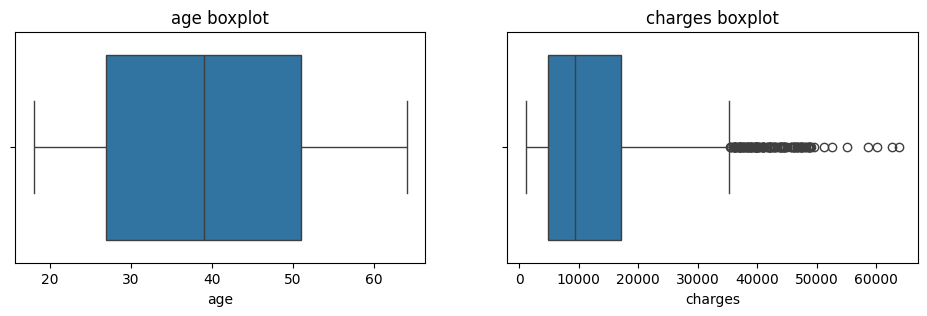

In [156]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(18, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

- **Remove Outliers**

In [157]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

- **Make Sure Outliers are removed**

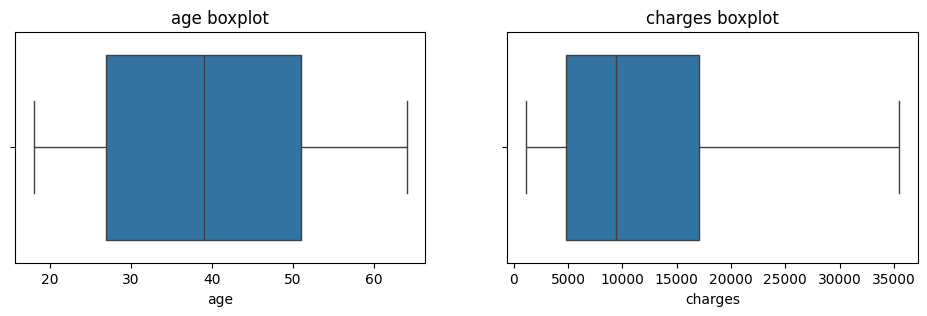

In [158]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(18, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

## **6- Visualization**

#### A. Data Distribution Graphs

- **Numerical Data Distribution Graphs**

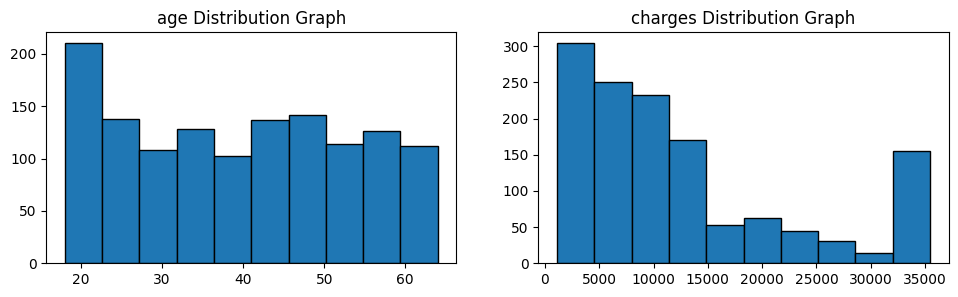

In [159]:
# Histogram
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(18, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.show()

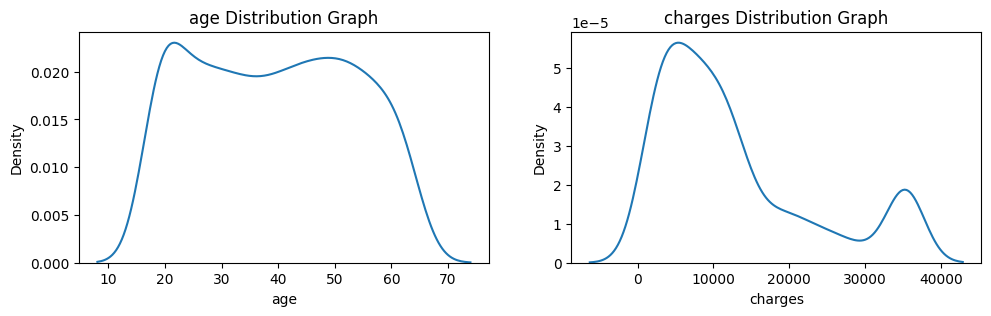

In [160]:
# Kde Plot
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(18, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution Graph")
plt.show()

- **Categorical Data Distribution Graphs**

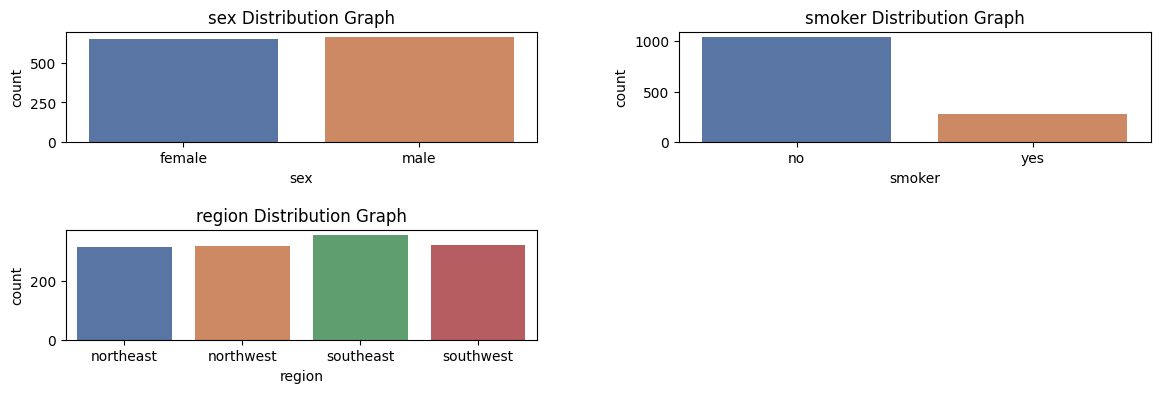

In [161]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, palette='deep')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

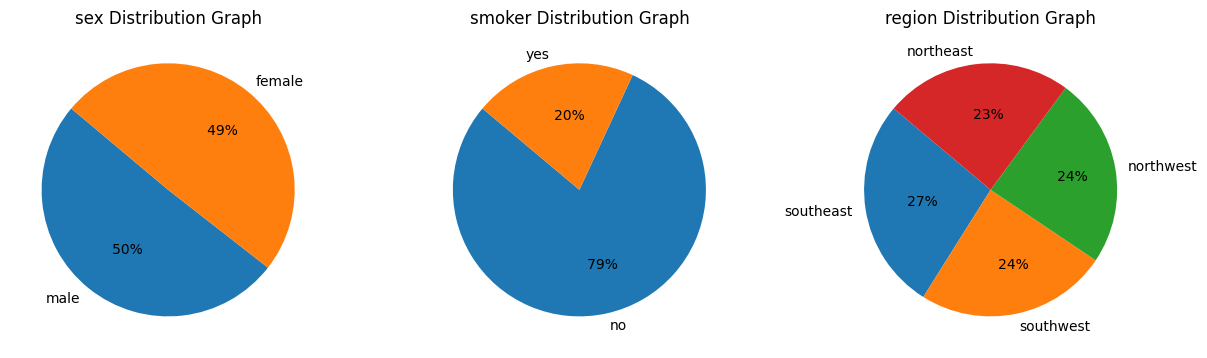

In [162]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(20, 125))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 4, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%5.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

- **Numerical/Numerical Relationship**

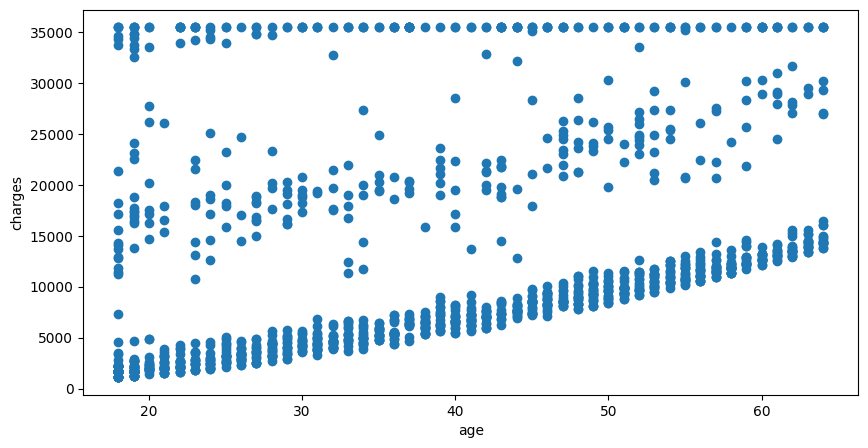

In [164]:
# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(df["age"], df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

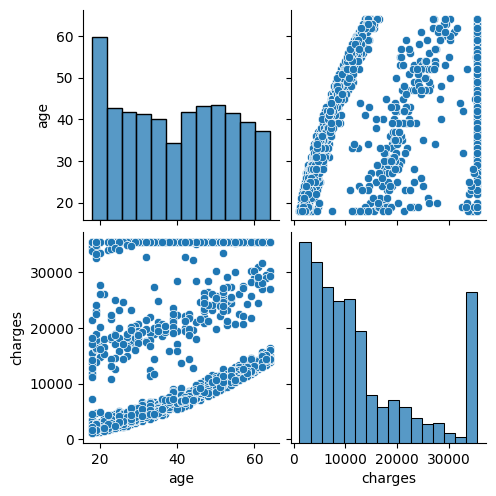

In [165]:
# Pair Plot
sns.pairplot(df)

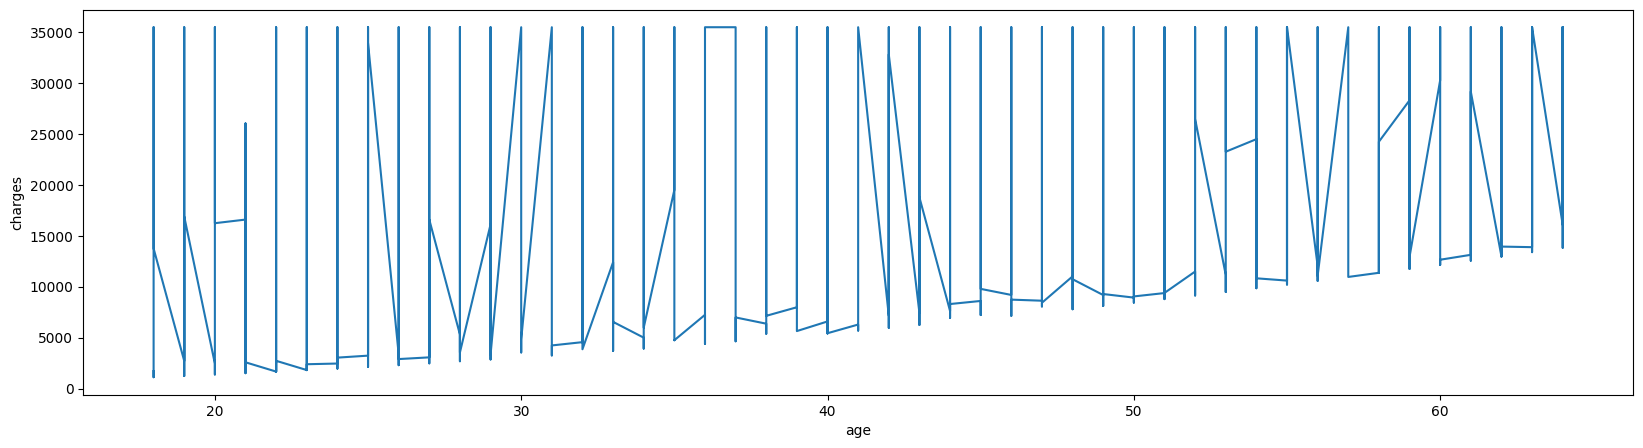

In [166]:
# Line Plot
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(20, 5))
plt.plot(sorted_df["age"], sorted_df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

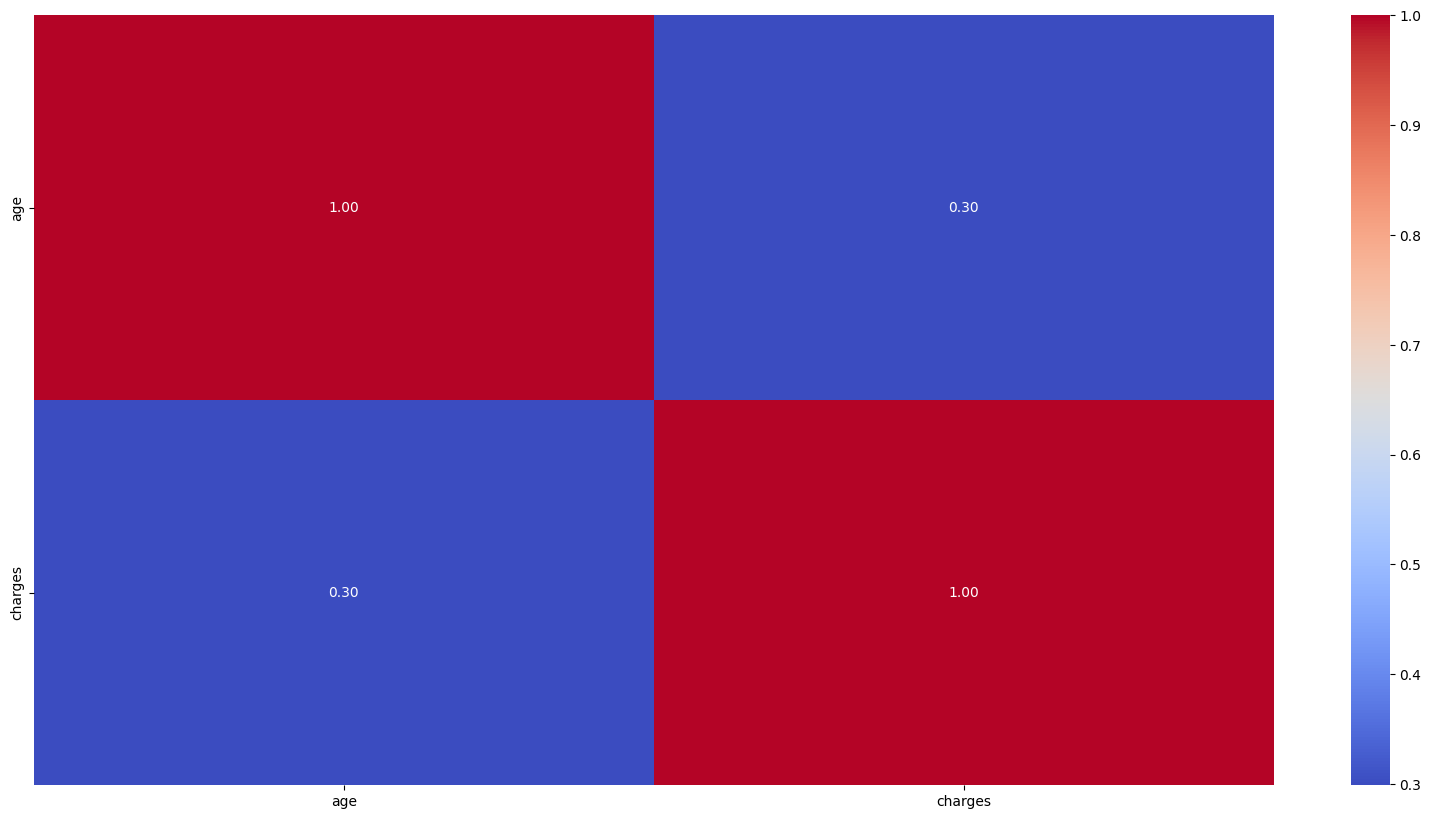

In [167]:
# Heat map
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- **Numerical/Categorical Relationship**

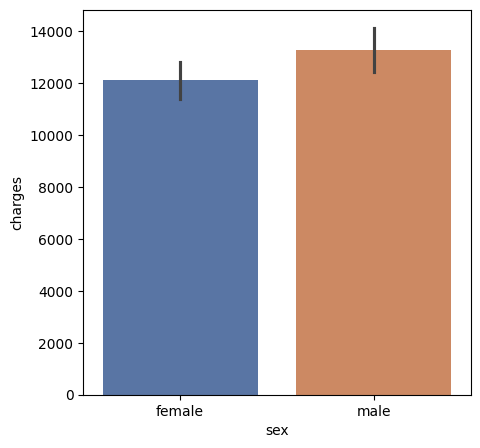

In [168]:
# bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x="sex", y="charges", data=df ,palette="deep")
plt.show()

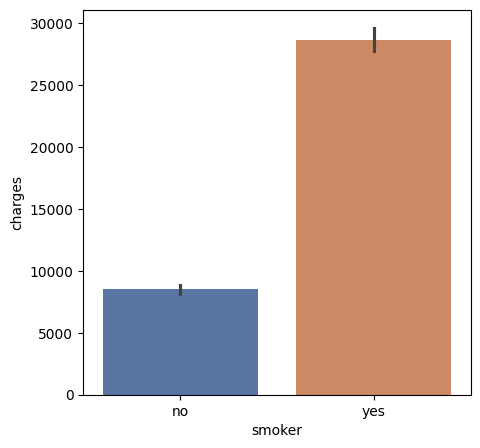

In [169]:
# bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x="smoker", y="charges", data=df ,palette="deep")
plt.show()

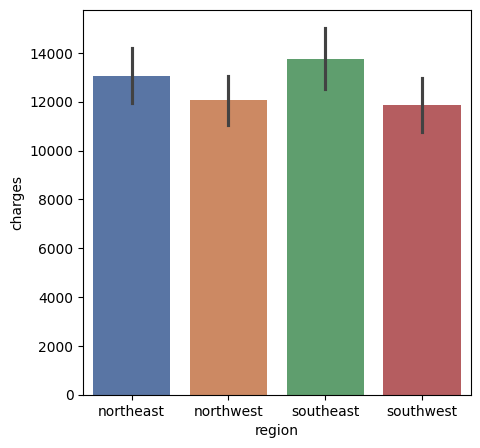

In [171]:
# bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x="region", y="charges", data=df ,palette="deep")
plt.show()

- **Categorical/Categorical Relationship**

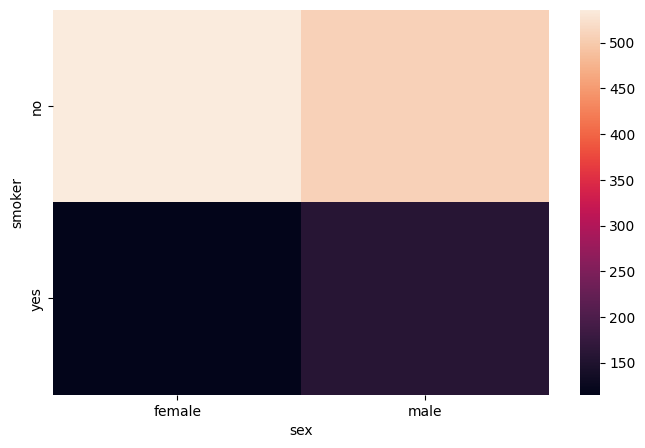

In [172]:
# Heat map
plt.figure(figsize=(8,5))
agg = df.pivot_table(index="smoker", columns="sex", values="age", aggfunc=len)
sns.heatmap(agg)
plt.show()

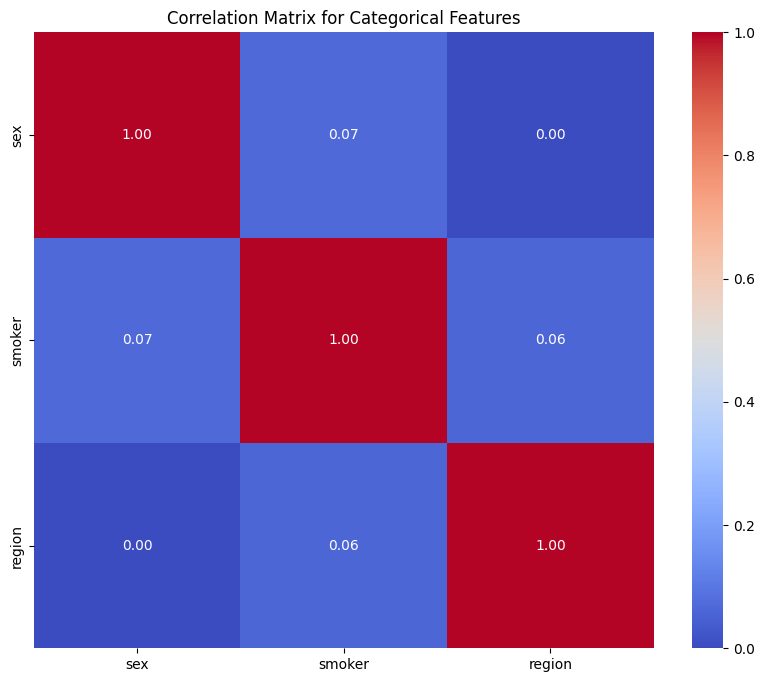

In [173]:
!pip install dython # install required module if not installed
from dython.nominal import cramers_v # import cramers_v function


# Calculate Cramér's V for categorical features
categorical_features = df.select_dtypes(include=['category']).columns
cramers_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))),
                             index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Categorical Features")
plt.show()

## **7- Data Splitting**

In [174]:
X = df.drop("charges", axis=1)
y = df[["charges"]]

In [176]:
X

,age,sex,smoker,region
0,19,female,yes,southwest
1,18,male,no,southeast
2,28,male,no,southeast
3,33,male,no,northwest
4,32,male,no,northwest
...,...,...,...,...
1333,50,male,no,northwest
1334,18,female,no,northeast
1335,18,female,no,southeast
1336,21,female,no,southwest


In [175]:
y

,charges
0,16884.0
1,1725.0
2,4449.0
3,21984.0
4,3866.0
...,...
1333,10600.0
1334,2205.0
1335,1629.0
1336,2007.0


## **8- Normalization**

In [181]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [182]:
X

,age,sex,smoker,region
0,0.021739,female,yes,southwest
1,0.000000,male,no,southeast
2,0.217391,male,no,southeast
3,0.326087,male,no,northwest
4,0.304348,male,no,northwest
...,...,...,...,...
1333,0.695652,male,no,northwest
1334,0.000000,female,no,northeast
1335,0.000000,female,no,southeast
1336,0.065217,female,no,southwest


In [184]:
from sklearn.preprocessing import MinMaxScaler
num_cols = y.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(y[num_cols])
y[num_cols] = scaler.transform(y[num_cols])

In [185]:
y

,charges
0,0.459074
1,0.017591
2,0.096923
3,0.607604
4,0.079944
...,...
1333,0.276062
1334,0.031570
1335,0.014795
1336,0.025803


## **9- Encoding**

- **Check for Number of Unique Values**

In [187]:
str_cols = ["sex", "smoker" , "region"]
pd.DataFrame(X[str_cols].nunique()).T

,sex,smoker,region
0,2,2,4


- **One Hot Encoder**

In [189]:
!pip install category-encoders
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00


In [191]:
X

,age,sex_1,sex_2,smoker_1,smoker_2,region_1,region_2,region_3,region_4
0,0.021739,1,0,1,0,1,0,0,0
1,0.000000,0,1,0,1,0,1,0,0
2,0.217391,0,1,0,1,0,1,0,0
3,0.326087,0,1,0,1,0,0,1,0
4,0.304348,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0,1,0,1,0,0,1,0
1334,0.000000,1,0,0,1,0,0,0,1
1335,0.000000,1,0,0,1,0,1,0,0
1336,0.065217,1,0,0,1,1,0,0,0


In [192]:
y

,charges
0,0.459074
1,0.017591
2,0.096923
3,0.607604
4,0.079944
...,...
1333,0.276062
1334,0.031570
1335,0.014795
1336,0.025803
